In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=True)


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

2024-01-20 11:49:33,525 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2024-01-20 11:49:33,525 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-20 11:49:33,534 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2024-01-20 11:49:33,535 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-20 11:49:33,536 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2024-01-20 11:49:33,536 INFO sqlalchemy.engine.Engine [raw sql] ('measurement',)
2024-01-20 11:49:33,536 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("measurement")
2024-01-20 11:49:33,536 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-20 11:49:33,536 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("measurement")
2024-01-20 11:49:33,536 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-20 11:49:33,536 INFO sqlalchemy.engine.Engine SELECT sql

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Using inspect to determine table layouts

# measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)

2024-01-20 11:49:37,655 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2024-01-20 11:49:37,656 INFO sqlalchemy.engine.Engine [raw sql] ()
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [10]:
# List of column names in Station Table
columns = inspector.get_columns('station')
for c in columns:
    print(c)

2024-01-20 11:49:38,517 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("station")
2024-01-20 11:49:38,517 INFO sqlalchemy.engine.Engine [raw sql] ()
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [11]:
# Find the most recent date in the data set.
# use measure table
recentdate = session.query(measure.date).order_by(measure.date.desc()).first()
print(recentdate)

2024-01-20 11:49:39,252 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-20 11:49:39,257 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2024-01-20 11:49:39,258 INFO sqlalchemy.engine.Engine [generated in 0.00122s] (1, 0)
('2017-08-23',)


2024-01-20 11:51:47,319 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2024-01-20 11:51:47,320 INFO sqlalchemy.engine.Engine [generated in 0.00125s] ('2016-08-23',)


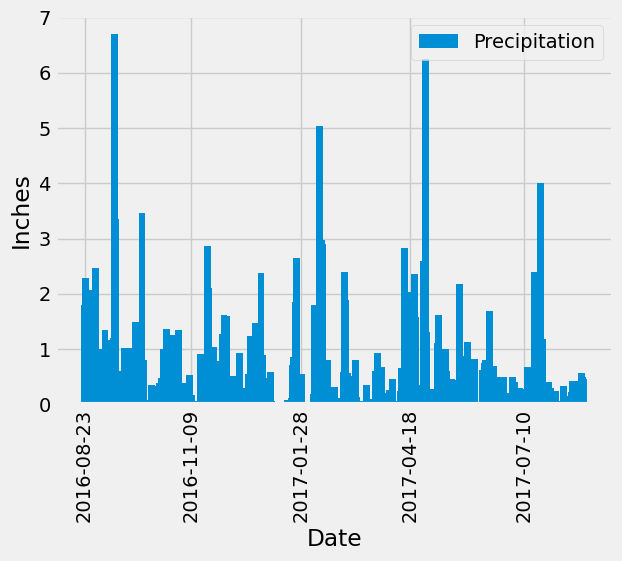

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database

# Calculate the date one year from the last date in data set.
querydate = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measure.date, measure.prcp).\
    filter(measure.date >= querydate).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip = pd.DataFrame(data, columns=["Date", "Precipitation"])

# Sort the dataframe by date
precip_sort = precip.sort_values("Date")
precip_sort = precip_sort.dropna()
precip_sort = precip_sort.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
xval = precip_sort['Date'].tolist()
yval = precip_sort['Precipitation'].tolist()
plt.bar(xval, yval, width=5)
plt.xticks(["2016-08-23","2016-11-09","2017-01-28", "2017-04-18","2017-07-10"], rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"])
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_sort.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
station_list = session.query(station.id).distinct().count()
station_list

2024-01-20 12:01:45,267 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM (SELECT DISTINCT station.id AS station_id 
FROM station) AS anon_1
2024-01-20 12:01:45,268 INFO sqlalchemy.engine.Engine [cached since 39.52s ago] ()


9

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activestat = session.query(measure.station, func.count(measure.station)).\
    group_by(measure.station).order_by(func.count(measure.station).desc()).all()
activestat

2024-01-20 12:15:05,038 INFO sqlalchemy.engine.Engine SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
2024-01-20 12:15:05,040 INFO sqlalchemy.engine.Engine [cached since 56.07s ago] ()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = session.query(func.min(measure.tobs),func.max(measure.tobs), func.avg(measure.tobs)).\
    group_by(measure.station).filter(measure.station == 'USC00519281').all()
stats

2024-01-20 12:27:19,088 INFO sqlalchemy.engine.Engine SELECT min(measurement.tobs) AS min_1, max(measurement.tobs) AS max_1, avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ? GROUP BY measurement.station
2024-01-20 12:27:19,089 INFO sqlalchemy.engine.Engine [cached since 415.4s ago] ('USC00519281',)


[(54.0, 85.0, 71.66378066378067)]

2024-01-20 13:11:52,099 INFO sqlalchemy.engine.Engine SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ? AND measurement.date >= ?
2024-01-20 13:11:52,100 INFO sqlalchemy.engine.Engine [cached since 983.6s ago] ('USC00519281', '2016-08-23')


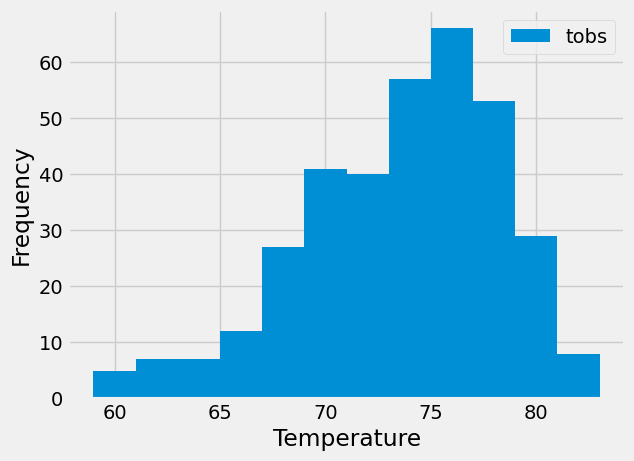

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

activestation = session.query(measure.tobs).\
    filter(measure.station == 'USC00519281').\
    filter(measure.date >= querydate).all()

statdf = pd.DataFrame(activestation, columns=["tobs"])

plt.hist(statdf, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'])
plt.show()

# Close Session

In [16]:
# Close Session
session.close()